In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telecom-users-dataset/telecom_users.csv


In [2]:
data = pd.read_csv('/kaggle/input/telecom-users-dataset/telecom_users.csv')
data.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [4]:
# Convert TotalCharges to numeric type
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# EDA
* customerID - customer id
* gender - client gender (male / female)
* SeniorCitizen - is the client retired (1, 0)
* Partner - is the client married (Yes, No)
* tenure - how many months a person has been a client of the company
* PhoneService - is the telephone service connected (Yes, No)
* MultipleLines - are multiple phone lines connected (Yes, No, No phone service)
* InternetService - client's Internet service provider (DSL, Fiber optic, No)
* OnlineSecurity - is the online security service connected (Yes, No, No internet service)
* OnlineBackup - is the online backup service activated (Yes, No, No internet service)
* DeviceProtection - does the client have equipment insurance (Yes, No, No internet service)
* TechSupport - is the technical support service connected (Yes, No, No internet service)
* StreamingTV - is the streaming TV service connected (Yes, No, No internet service)
* StreamingMovies - is the streaming cinema service activated (Yes, No, No internet service)
* Contract - type of customer contract (Month-to-month, One year, Two year)
* PaperlessBilling - whether the client uses paperless billing (Yes, No)
* PaymentMethod - payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit * card (automatic))
* MonthlyCharges - current monthly payment
* TotalCharges - the total amount that the client paid for the services for the entire time
* Churn - whether there was a churn (Yes or No)

No     4399
Yes    1587
Name: Churn, dtype: int64


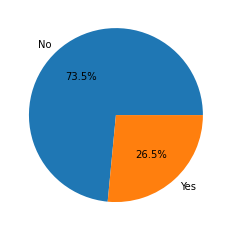

In [5]:
# check for imbalance in data
print(data['Churn'].value_counts())
plt.pie(data['Churn'].value_counts(), autopct='%1.1f%%', labels = ['No', 'Yes']);

In [6]:
def plot_category(feature, figsize=None):
    yes_count = data[data['Churn']=='Yes'].groupby([feature]).size()
    no_count = data[data['Churn']=='No'].groupby([feature]).size()
    labels = no_count.index

    x = np.arange(len(labels)) # the label locations
    width = 0.35  # the width of the bars

    if figsize:
        fig, ax = plt.subplots(figsize=figsize)
    else:
        fig, ax = plt.subplots()
    rects1 = ax.bar(x-width/2, round(yes_count*100/data.groupby([feature]).size(), 2), 
                    width, label='Yes')
    rects2 = ax.bar(x+width/2, round(no_count*100/data.groupby([feature]).size(), 2), 
                    width, label='No')

    ax.set_ylabel('Count')
    ax.set_title('Based on %s'%feature)
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=80)
    ax.legend();

    ax.bar_label(rects1, padding=1)
    ax.bar_label(rects2, padding=1)

    fig.tight_layout()
    plt.show()
    
def plot_numerical(feature, figsize=None):
    # Attrition vs Age Distribution
    fig = plt.figure(figsize=(10,6))

    sns.kdeplot(data[data['Churn']=='No'][feature])
    sns.kdeplot(data[data['Churn']=='Yes'][feature])

    fig.legend(labels=['Churn No', 'Churn Yes'])
    plt.title('Based on %s'%feature)
    plt.show()

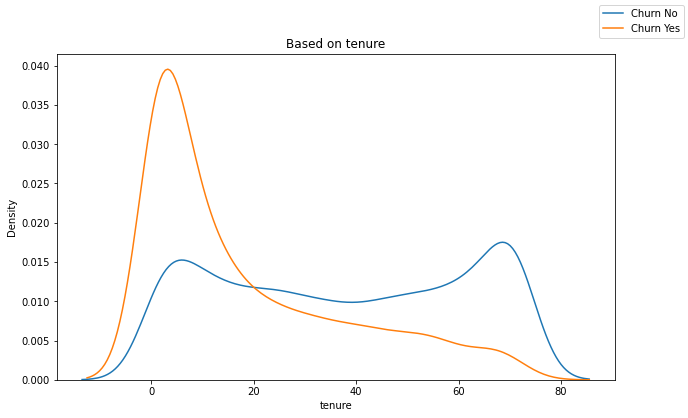

In [7]:
for feature in ['tenure']:
    plot_numerical(feature)

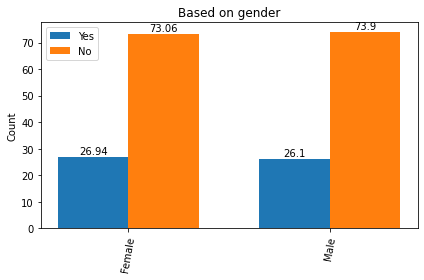

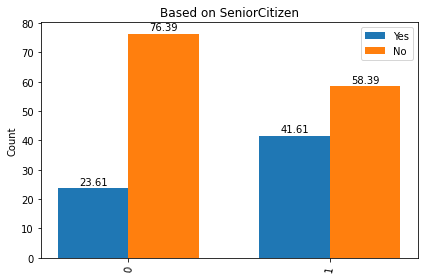

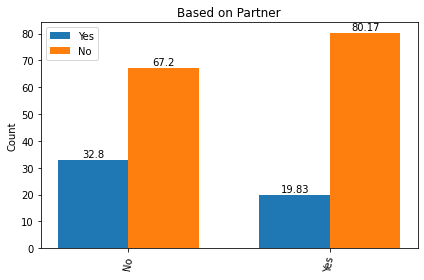

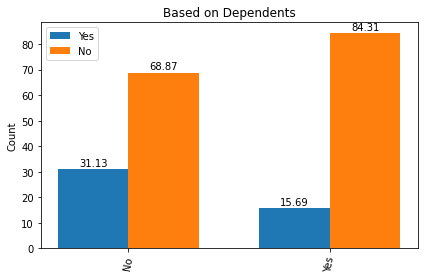

In [8]:
for feature in ['gender', 'SeniorCitizen', 'Partner', 'Dependents']:
    plot_category(feature)

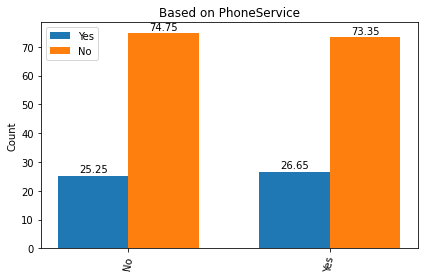

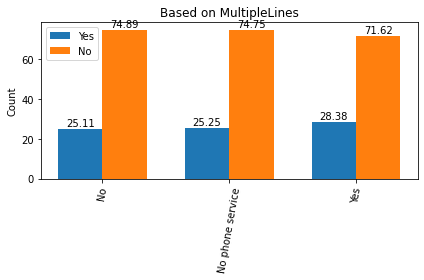

In [9]:
for feature in ['PhoneService', 'MultipleLines']:
    plot_category(feature)

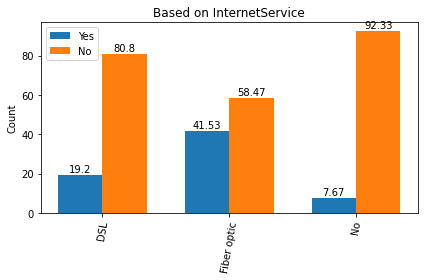

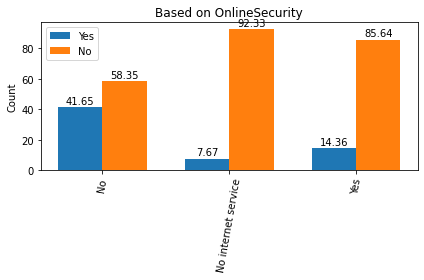

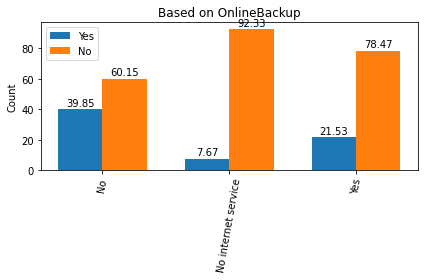

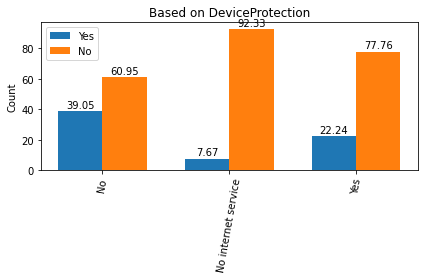

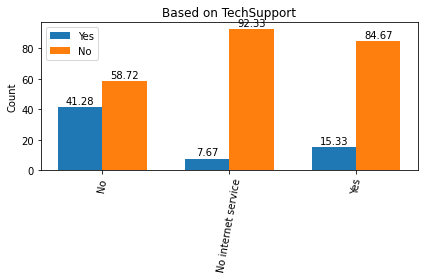

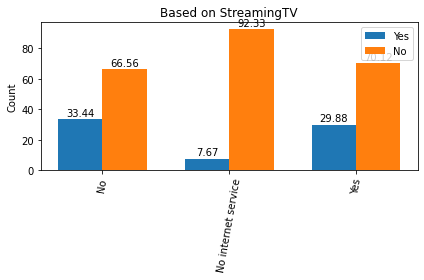

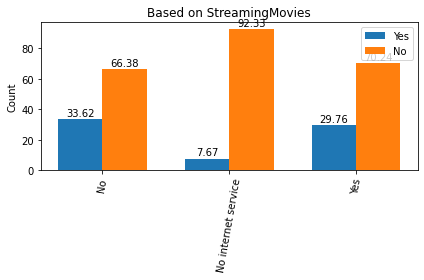

In [10]:
for feature in ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                'TechSupport', 'StreamingTV', 'StreamingMovies']:
    plot_category(feature)

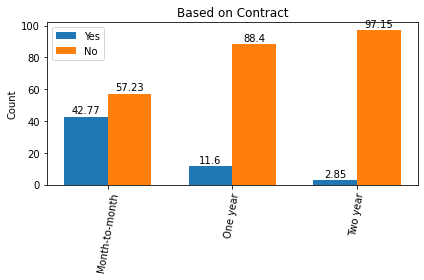

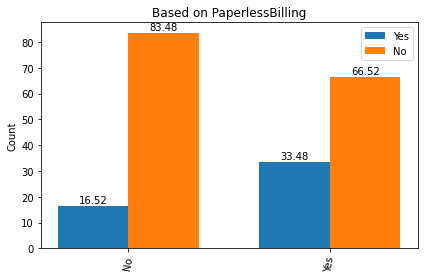

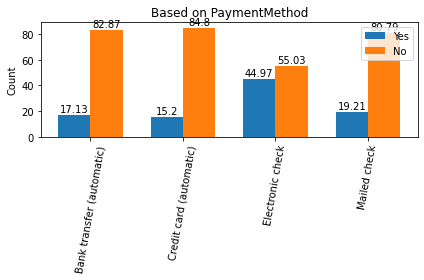

In [11]:
for feature in ['Contract', 'PaperlessBilling', 'PaymentMethod']:
    plot_category(feature)

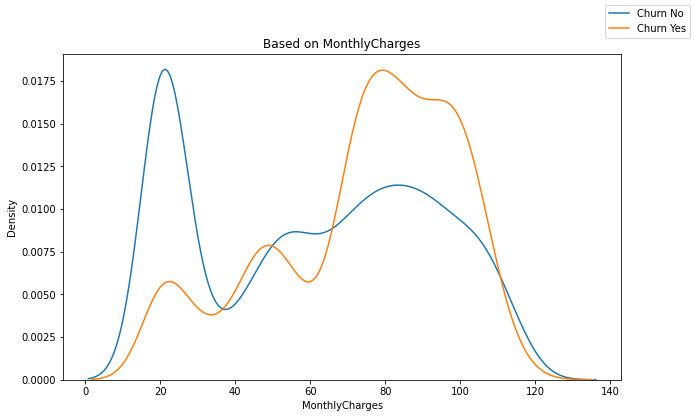

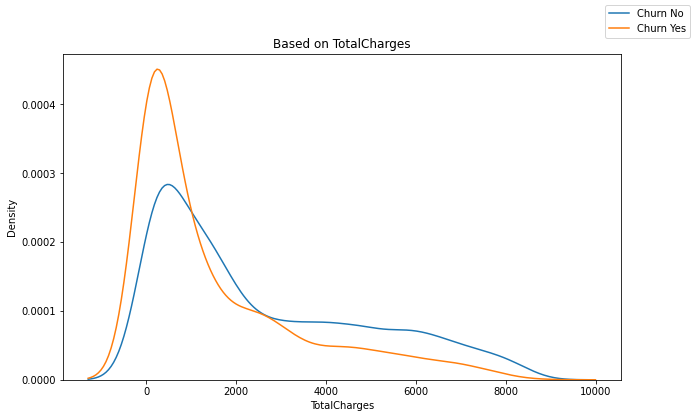

In [12]:

for feature in ['MonthlyCharges', 'TotalCharges']:
    plot_numerical(feature)

**Columns that are contributing towards churn:**
* Drop **customerID** as all values are unique
* gender - not much
* SeniorCitizen - yes
* Partner - No partner
* Dependents - No dependents
* tenure < 20 months
* InternetService - fibre optic & DSL.
* Users who do not take **OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV or StreamingMovies** services have higher churn from users who do. While users with no internet service have least churn
* Contract - Month-to-Month
* PaperlessBilling - Yes
* PaymentMethod - Electronic Check
* MonthlyCharges > 60
* TotalCharges < 2000

In [13]:
categorical_features = ['gender', 'SeniorCitizen', 'Partner',
                       'Dependents', 'PhoneService', 'MultipleLines',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                       'PaperlessBilling', 'PaymentMethod']
numerical_features = ['MonthlyCharges', 'TotalCharges', 'tenure']

to_drop = ['customerID', 'Unnamed: 0'] # contain all unique values or not relevant

# Label encoding categorical features for correlation

In [14]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import os
import joblib

In [15]:
df = data.copy()
path = '/kaggle/working'
for i, feature in enumerate(categorical_features):
    le = LabelEncoder()

    # create directory to save label encoding models
    if not os.path.exists(os.path.join(path, "TextEncoding")):
        os.makedirs(os.path.join(path, "TextEncoding"))

    # perform label encoding
    le.fit(df[feature])
    
    # save the encoder
    joblib.dump(le, open(os.path.join(path, "TextEncoding/le_{}.sav".format(feature)), 'wb'))
    
    # transfrom training data
    df[feature] = le.transform(df[feature])

    # get classes & remove first column to elude from dummy variable trap
    columns = list(map(lambda x: feature+' '+str(x), list(le.classes_)))[1:]
    
    # save classes
    joblib.dump(columns, 
                open(os.path.join(path, "TextEncoding/le_{}_classes.sav".format(feature)), 'wb'))

# CORRELATION

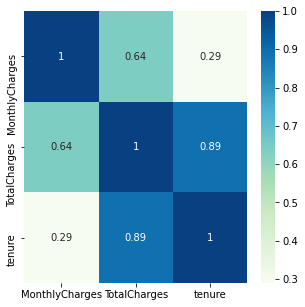

In [16]:
# Bivariate Analysis Correlation plot with the Numeric variables
plt.figure(figsize=(5, 5))
sns.heatmap(round(data[numerical_features].corr(method='spearman'), 2), 
            annot=True, mask=None, cmap='GnBu')
plt.show()

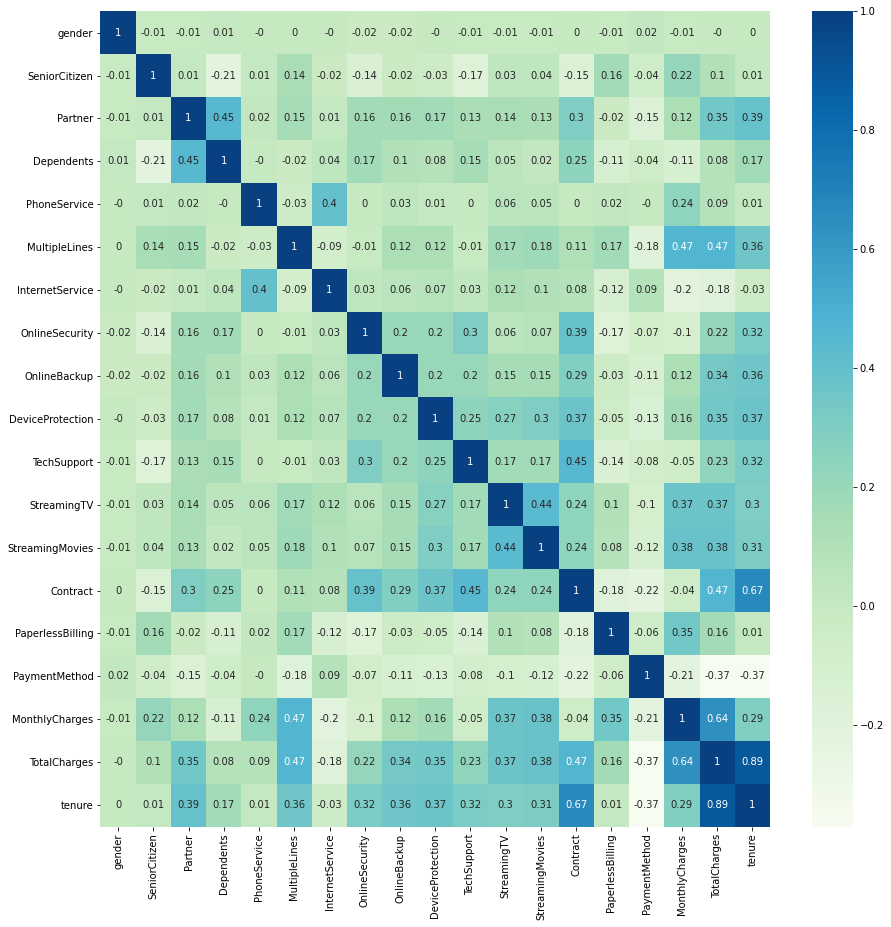

In [17]:
# Bivariate Analysis Correlation plot with the Categorical variables
plt.figure(figsize=(15, 15))
sns.heatmap(round(df[categorical_features+numerical_features].corr(method='spearman'), 2), annot=True,
            mask=None, cmap='GnBu')
plt.show()

**Observations:**
* Tenure - TotalCharges
* Contract - Tenure
* MonthlyCharges - TotalCharges

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [19]:
# Calculating VIF
vif = pd.DataFrame()
temp = df.dropna()
vif["variables"] = [feature for feature in categorical_features+numerical_features if feature not in ['MonthlyCharges', 'tenure']]
vif["VIF"] = [variance_inflation_factor(temp[vif['variables']].values, i) for i in range(len(vif["variables"]))]
print(vif)

           variables       VIF
0             gender  1.932655
1      SeniorCitizen  1.336345
2            Partner  2.765156
3         Dependents  1.948198
4       PhoneService  8.149412
5      MultipleLines  2.542940
6    InternetService  3.464196
7     OnlineSecurity  2.222989
8       OnlineBackup  2.446635
9   DeviceProtection  2.616174
10       TechSupport  2.381696
11       StreamingTV  3.069721
12   StreamingMovies  3.132856
13          Contract  3.057732
14  PaperlessBilling  2.608564
15     PaymentMethod  3.012619
16      TotalCharges  5.348046


# Handling Missing Values

In [20]:
missingValueFeatures = pd.DataFrame({'missing %': data.isnull().sum()*100/len(data)})
missingValueFeatures[missingValueFeatures['missing %']>0]

,missing %
TotalCharges,0.167056


As TotalCharges is highly correlated with tenure, we will update the null values as per the tenure

In [21]:
# Impute TotalCharges as per Tenure Column
print('Before Imputation')
print(data['TotalCharges'].describe())

data.sort_values('tenure', inplace=True)
# use back fill to replace nan values
data['TotalCharges'].fillna(method='bfill', inplace=True)

print('\nAfter Imputation')
print(data['TotalCharges'].describe())

Before Imputation
count    5976.000000
mean     2298.060617
std      2274.127165
min        18.800000
25%       404.312500
50%      1412.150000
75%      3846.962500
max      8684.800000
Name: TotalCharges, dtype: float64

After Imputation
count    5986.000000
mean     2294.255137
std      2274.130391
min        18.800000
25%       401.587500
50%      1408.575000
75%      3841.500000
max      8684.800000
Name: TotalCharges, dtype: float64


# Handling Categorical Features (Label Encoding & One Hot Encoding)

In [22]:
df = data.copy()
path = '/kaggle/working'
for i, feature in enumerate(categorical_features):
    
    le = LabelEncoder()
    ohe = OneHotEncoder(sparse=False)

    # create directory to save label encoding models
    if not os.path.exists(os.path.join(path, "TextEncoding")):
        os.makedirs(os.path.join(path, "TextEncoding"))

    # perform label encoding
    le.fit(df[feature])
    # save the encoder
    joblib.dump(le, open(os.path.join(path, "TextEncoding/le_{}.sav".format(feature)), 'wb'))
    
    # transfrom training data
    df[feature] = le.transform(df[feature])

    # get classes & remove first column to elude from dummy variable trap
    columns = list(map(lambda x: feature+' '+str(x), list(le.classes_)))[1:]
    
    # save classes
    joblib.dump(columns, 
                open(os.path.join(path, "TextEncoding/le_{}_classes.sav".format(feature)), 'wb'))
    # load classes
    columns = joblib.load(
        open(os.path.join(path, "TextEncoding/le_{}_classes.sav".format(feature)), 'rb'))

    if len(le.classes_)>2:
        # perform one hot encoding
        ohe.fit(df[[feature]])
        # save the encoder
        joblib.dump(ohe, 
                    open(os.path.join(path, "TextEncoding/ohe_{}.sav".format(feature)), 'wb'))

        # transfrom training data
        # removing first column of encoded data to elude from dummy variable trap
        tempData = ohe.transform(df[[feature]])[:, 1:]

        # create Dataframe with columns as classes
        tempData = pd.DataFrame(tempData, columns=columns)
    else:
        tempData = df[[feature]]
    
    # create dataframe with all the label encoded categorical features along with hot encoding
    if i==0:
        encodedData = pd.DataFrame(data=tempData, columns=tempData.columns.values.tolist())
    else:
        encodedData = pd.concat([encodedData, tempData], axis=1)

In [23]:
# merge numerical features and categorical encoded features
df = df[numerical_features+['Churn']]
df = pd.concat([df, encodedData], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5986 entries, 0 to 5985
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   MonthlyCharges                         5986 non-null   float64
 1   TotalCharges                           5986 non-null   float64
 2   tenure                                 5986 non-null   int64  
 3   Churn                                  5986 non-null   object 
 4   gender                                 5986 non-null   int64  
 5   SeniorCitizen                          5986 non-null   int64  
 6   Partner                                5986 non-null   int64  
 7   Dependents                             5986 non-null   int64  
 8   PhoneService                           5986 non-null   int64  
 9   MultipleLines No phone service         5986 non-null   float64
 10  MultipleLines Yes                      5986 non-null   float64
 11  Inte

# Training Model

In [24]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics, preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVC

In [25]:
train_data = df.copy()
feature_cols = [feature for feature in train_data.columns if feature not in(['Churn'])]

''' Rescaling to [0,1] '''
scaler = MinMaxScaler()
scaler.fit(train_data[feature_cols])
train_data[feature_cols] = scaler.transform(train_data[feature_cols])

In [26]:
X = train_data[feature_cols]
y = train_data['Churn'].map({'No':0, 'Yes':1})

validation_size = 0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=validation_size, 
                                                    random_state=4, stratify=y)

# Model 1: Logistic Regression

As we are more interested in finding the customers who will leave and hence we will give more weights to class 1

In [27]:
model = LogisticRegression(class_weight={0:1, 1:10})
model.fit(X_train, y_train)

LogisticRegression(class_weight={0: 1, 1: 10})

In [28]:
y_pred = model.predict(X_train)

print('Train metrics...')
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

y_pred = model.predict(X_test)

print('Validation metrics...')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Train metrics...
[[1209 2090]
 [  52 1138]]
              precision    recall  f1-score   support

           0       0.96      0.37      0.53      3299
           1       0.35      0.96      0.52      1190

    accuracy                           0.52      4489
   macro avg       0.66      0.66      0.52      4489
weighted avg       0.80      0.52      0.53      4489

Validation metrics...
[[399 701]
 [ 11 386]]
              precision    recall  f1-score   support

           0       0.97      0.36      0.53      1100
           1       0.36      0.97      0.52       397

    accuracy                           0.52      1497
   macro avg       0.66      0.67      0.52      1497
weighted avg       0.81      0.52      0.53      1497



In [29]:
''' metrics on original data '''
y_pred = model.predict(train_data[feature_cols])


def make_cm(matrix, columns):
    n = len(columns)
    act = ['actual Churn'] * n
    pred = ['prediction Churn'] * n

    cm = pd.DataFrame(matrix, 
        columns=[pred, columns], index=[act, columns])
    return cm

df_matrix=make_cm(
    confusion_matrix(y, y_pred),['No','Yes'])

display(df_matrix)
print(classification_report(y, y_pred))

prediction Churn      
                               No   Yes
actual Churn No              1608  2791
             Yes               63  1524

              precision    recall  f1-score   support

           0       0.96      0.37      0.53      4399
           1       0.35      0.96      0.52      1587

    accuracy                           0.52      5986
   macro avg       0.66      0.66      0.52      5986
weighted avg       0.80      0.52      0.53      5986



# Model 2: SVM

In [30]:
model = SVC(class_weight={0: 1, 1: 10})
model.fit(X_train, y_train)

SVC(class_weight={0: 1, 1: 10})

In [31]:
y_pred = model.predict(X_train)

print('Train metrics...')
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

y_pred = model.predict(X_test)

print('Test metrics...')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Train metrics...
[[1652 1647]
 [  11 1179]]
              precision    recall  f1-score   support

           0       0.99      0.50      0.67      3299
           1       0.42      0.99      0.59      1190

    accuracy                           0.63      4489
   macro avg       0.71      0.75      0.63      4489
weighted avg       0.84      0.63      0.64      4489

Test metrics...
[[484 616]
 [ 42 355]]
              precision    recall  f1-score   support

           0       0.92      0.44      0.60      1100
           1       0.37      0.89      0.52       397

    accuracy                           0.56      1497
   macro avg       0.64      0.67      0.56      1497
weighted avg       0.77      0.56      0.58      1497



In [32]:
''' metrics on original data '''
y_pred = model.predict(train_data[feature_cols])

def make_cm(matrix, columns):
    n = len(columns)
    act = ['actual Churn'] * n
    pred = ['prediction Churn'] * n

    cm = pd.DataFrame(matrix, 
        columns=[pred, columns], index=[act, columns])
    return cm

df_matrix=make_cm(
    confusion_matrix(y, y_pred),['No','Yes'])

display(df_matrix)
print(classification_report(y, y_pred))

prediction Churn      
                               No   Yes
actual Churn No              2136  2263
             Yes               53  1534

              precision    recall  f1-score   support

           0       0.98      0.49      0.65      4399
           1       0.40      0.97      0.57      1587

    accuracy                           0.61      5986
   macro avg       0.69      0.73      0.61      5986
weighted avg       0.82      0.61      0.63      5986

